In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline

In [0]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [9]:
for fn in uploaded.keys():
  print('user uploaded file "{name}" with length "{length}" bytes'.format(name = fn, length = len(uploaded[fn])))

user uploaded file "USA_Housing.csv" with length "726209" bytes


In [14]:
uploaded

{'USA_Housing.csv': b'Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address\n79545.45857431678,5.682861321615587,7.009188142792237,4.09,23086.800502686456,1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101"\n79248.64245482568,6.0028998082752425,6.730821019094919,3.09,40173.07217364482,1505890.91484695,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958"\n61287.067178656784,5.865889840310001,8.512727430375099,5.13,36882.15939970458,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489"\n63345.24004622798,7.1882360945186425,5.586728664827653,3.26,34310.24283090706,1260616.8066294468,"USS Barnett\nFPO AP 44820"\n59982.197225708034,5.040554523106283,7.839387785120487,4.23,26354.109472103148,630943.4893385402,"USNS Raymond\nFPO AE 09386"\n80175.7541594853,4.9884077575337145,6.104512439428879,4.04,26748.428424689715,1068138.0743935304,"06039 Jennifer Islands Apt. 443\nTracyport, KS 1

In [0]:
import io

In [0]:
df = pd.read_csv(io.StringIO(uploaded['USA_Housing.csv'].decode('utf-8')))

In [19]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [22]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

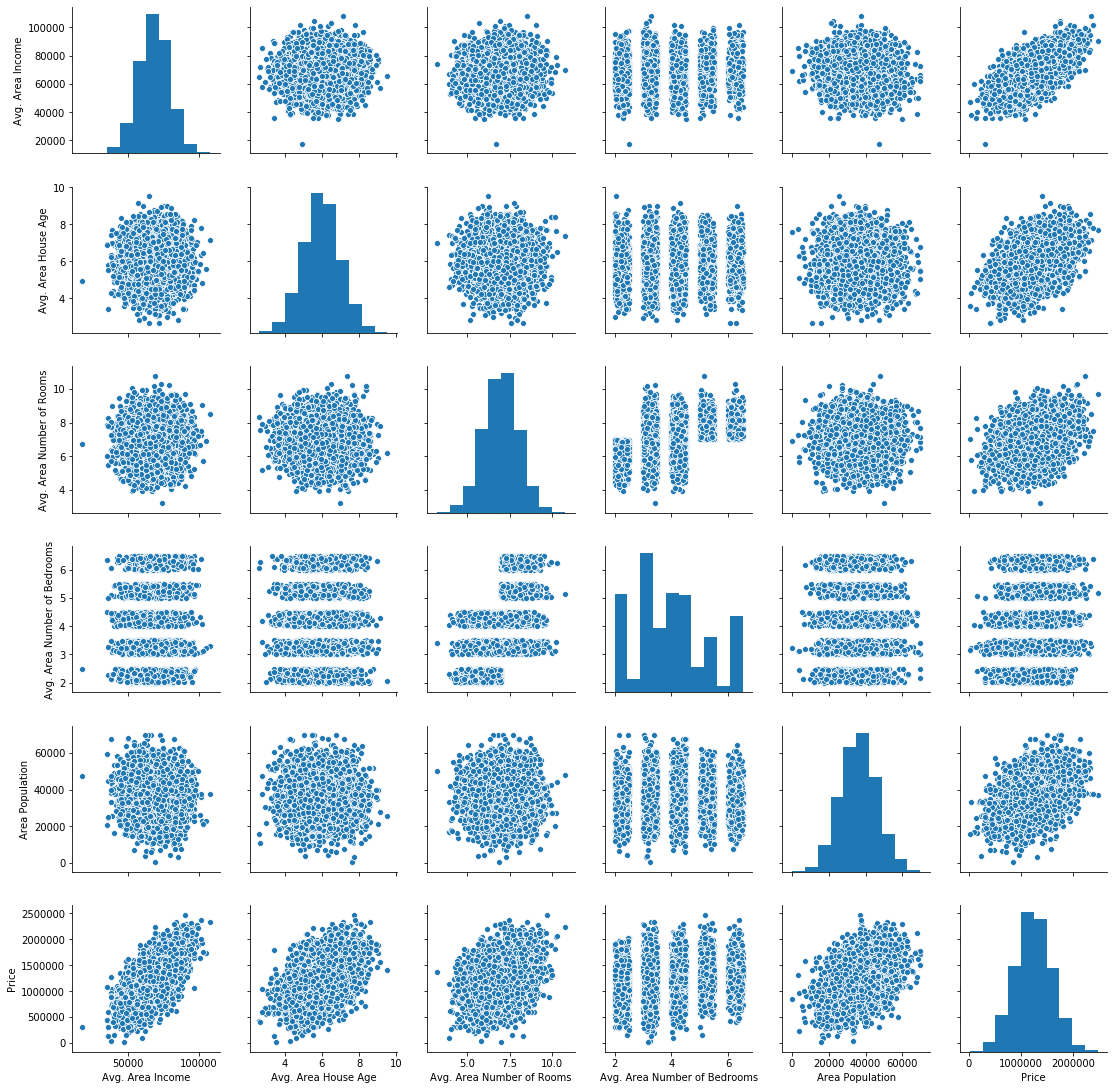

In [24]:
sns.pairplot(df)

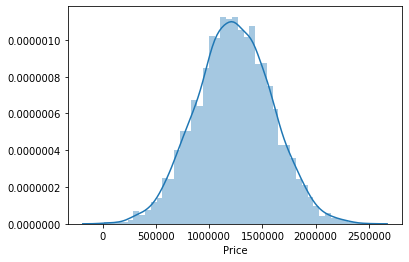

In [25]:
sns.distplot(df['Price'])

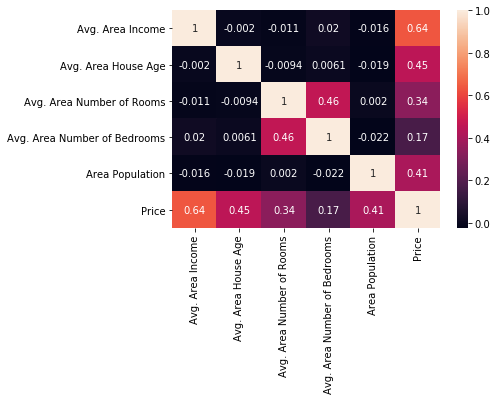

In [27]:
sns.heatmap(df.corr(), annot=True)

In [28]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [0]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']]

In [0]:
y = df['Price']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [0]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=101)
clf = LinearRegression().fit(X_train, y_train)

In [65]:
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print(clf.intercept_)

-4.656612873077393e-10


In [67]:
clf.coef_

array([ 1.67374274e-15,  4.74940087e-11, -4.92809676e-12,  1.87985701e-12,
       -1.66663558e-15,  1.00000000e+00,  0.00000000e+00])

In [0]:
lm = pd.DataFrame(clf.coef_, X.columns, columns=['coeff'])

In [69]:
lm

,coeff
Avg. Area Income,1.673743e-15
Avg. Area House Age,4.749401e-11
Avg. Area Number of Rooms,-4.928097e-12
Avg. Area Number of Bedrooms,1.879857e-12
Area Population,-1.666636e-15
Price,1.000000e+00
Address,0.000000e+00


In [0]:
predictions = clf.predict(X_test)

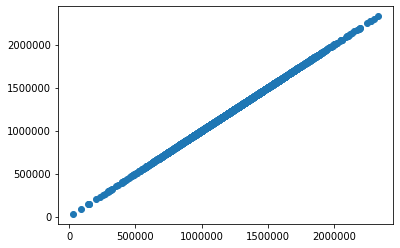

In [73]:
plt.scatter(y_test, predictions)

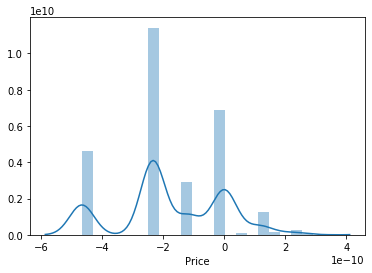

In [74]:
sns.distplot((y_test-predictions))

In [0]:
from sklearn import metrics

In [76]:
metrics.mean_absolute_error(y_test, predictions)

1.9501385395415126e-10

In [77]:
metrics.mean_squared_error(y_test, predictions)

6.131229459854532e-20

In [78]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.4761319552589543e-10